***IMPORTING LIBRARIES***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

***CREATING A POLYNOMIAL REGRESSION MODEL WITH GRADIENT DESCENT***

In [ ]:
class my_poly_reg():
  def __init__(self, X, Y, order = 1, epochs = 10,learning_rate=0.01):

    #Initializing the variables
    #X: The x values to train a model
    #Y: The Y values to train a model
    #order: Order of the regression model
    #epochs: the number of iterations for gradient descent
    #learn_rate = the learning rate of our model to update weights of gradient descent

    self.X = X
    self.Y = Y
    self.order = order
    self.epochs = epochs
    self.weights = []*(order+1)
    self.all_y_predicted = []
    self.learning_rate = learning_rate
  
  #Function to initialize weights and assign then random values
  def initializeWeights(self):
    self.weights = np.random.rand(self.order+1)

  #Function to get a predicted value of Y for a value of X 
  def get_predicted_y(self, x):
    predicted_y =0
    for j in range(self.order+1):
      predicted_y += (self.weights[j] * pow(x,j))
    return predicted_y
  
  #Function to get the mean squared error of the model with current weights
  def getMSE(self):
    error =0
    for i in range(self.order+1):
      predicted_y = self.get_predicted_y(x=self.X[i])
      self.all_y_predicted.append(predicted_y)
      error_curr = pow((self.Y[i] - predicted_y),2)
      error += error_curr
    return (error/(self.order+1))

  #Function to perform gradient descent and update weights
  def gradientDescent(self):
    no_of_weights = len(self.weights)
    intermediate = [[] for i in range(no_of_weights)]
    gradients =[]*no_of_weights
    
    for x,y_real,y_pred in zip(self.X, self.Y, self.all_y_predicted): 
      for power in range(no_of_weights):
        step = pow(x,power) * (y_real - y_pred)
        intermediate[power].append(step)

    for i in range(no_of_weights):
      gradients.append((-2 / no_of_weights) * sum(intermediate[i]))
    return gradients

  #This function updates weights once gradients are updated
  def update_weights(self, gradients):
    for i in range(len(self.weights)):
      self.weights[i] = self.weights[i] - self.learning_rate*gradients[i]
  
  #Perform an iteration to update gradient and weights
  def perform_epoch(self):
    gradients = self.gradientDescent()
    self.update_weights(gradients=gradients)

  #this function performs the training of our model
  def fit(self):
    self.initializeWeights()
    print("Initial Weights:",self.weights)
    final_weights = []
    least_mse = 1000.00
    for i in range(self.epochs):
      self.all_y_predicted =[]
      mse = self.getMSE()
      #print("iteration:",i+1,"\terror:", mse)
      self.perform_epoch()
      if mse < least_mse:
        least_mse = mse
        final_weights = self.weights
    print("Least error:",least_mse)
    self.weights = final_weights
    print("Final weights:",self.weights)
    return self.weights,least_mse

***Function to generate n pairs of X and Y***

In [ ]:
def genXY(n):
  X = np.random.uniform(low=0.0 , high= 1.0, size=n) #Generating n values of X between 0 and 1

  N = np.random.normal(size = n) #Generating n values of N from the gaussian Distribution

  #Using [y = sin(2.pi.x) + 0.1.N] to generate y 
  y =[]
  for i in range(n):
    y.append(math.sin(2 * np.pi * X[i]) + (0.1 * N[i]))
  
  return X,y

***GENERATING 20 PAIRS OF X AND Y***


In [ ]:
X,y = genXY(20)

print("X:\n",X)
print("Y:\n",y)

X:
 [0.42925954 0.04199974 0.32017656 0.1025467  0.98045831 0.42896136
 0.25453163 0.8245781  0.89979248 0.95240468 0.02088677 0.96498192
 0.5390733  0.72807362 0.91167957 0.47578949 0.37206178 0.03869638
 0.97998752 0.45386165]
Y:
 [0.40793416799355264, 0.0965169602586925, 0.8352178661754194, 0.4921400077360729, -0.08199646715700815, 0.506877915392716, 0.9450766409072217, -0.9209014765529042, -0.5113058351203097, -0.23862953950241036, 0.16102270016477507, -0.00795585042927599, -0.3289570206672211, -1.2150329704943514, -0.4732820648533019, 0.014618697679765036, 0.7936311047254876, 0.2965179506310417, -0.11508352142880766, 0.31810986935652313]


***Plotting X and Y on the graph***

[]

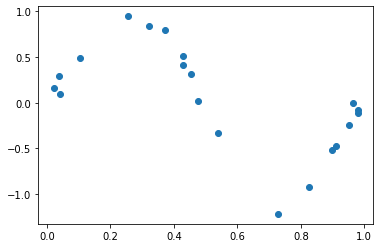

In [ ]:
  plt.scatter(X,y)
  plt.plot()

***Splitting the data for training and testing***

In [ ]:
train_X = X[0:10]
train_y = y[0:10]

test_X = X[10:20]
test_y = y[10:20]

***Print training and testing Data***

In [ ]:
print("Training data")
print("X:" , train_X)
print("Y:" , train_y)
print("Testing data")
print("X:" , test_X)
print("Y:" , test_y)

Training data
X: [0.42925954 0.04199974 0.32017656 0.1025467  0.98045831 0.42896136
 0.25453163 0.8245781  0.89979248 0.95240468]
Y: [0.40793416799355264, 0.0965169602586925, 0.8352178661754194, 0.4921400077360729, -0.08199646715700815, 0.506877915392716, 0.9450766409072217, -0.9209014765529042, -0.5113058351203097, -0.23862953950241036]
Testing data
X: [0.02088677 0.96498192 0.5390733  0.72807362 0.91167957 0.47578949
 0.37206178 0.03869638 0.97998752 0.45386165]
Y: [0.16102270016477507, -0.00795585042927599, -0.3289570206672211, -1.2150329704943514, -0.4732820648533019, 0.014618697679765036, 0.7936311047254876, 0.2965179506310417, -0.11508352142880766, 0.31810986935652313]


***TRAINING THE MODEL WITH OUR TRAINING DATA SET AND FINDING VALUES FOR Y***

In [ ]:
errors_train=[] #list to store errors generated
iterations =50000

***For order 0***

In [ ]:
my_poly_regressor1 = my_poly_reg(X=train_X, Y=train_y, order=0, epochs=iterations)

In [ ]:
weights_zero,min_error = my_poly_regressor1.fit()
errors_train.append(min_error)

Initial Weights: [0.91357107]
Least error: 1.7749370367472766e-30
Final weights: [0.40793417]


getting values of Y for train X

In [ ]:
y_zero_order =[]
for i in range(len(train_X)):
  y_zero_order.append(my_poly_regressor1.get_predicted_y(x=train_X[i]))

***For order 1***

In [ ]:
my_poly_regressor2 = my_poly_reg(X=train_X, Y=train_y, order=1, epochs=iterations)

In [ ]:
weights_one,min_error = my_poly_regressor2.fit()
errors_train.append(min_error)

Initial Weights: [0.90515413 0.60891628]
Least error: 2.1612978428908e-28
Final weights: [0.06274262 0.80415579]


Getting values of Y

In [ ]:
y_first_order =[]
for i in range(len(train_X)):
  y_first_order.append(my_poly_regressor2.get_predicted_y(x=train_X[i]))

***For order 2***

In [ ]:
my_poly_regressor20 = my_poly_reg(X=train_X, Y=train_y, order=2, epochs=iterations)

In [ ]:
weights_two,min_error = my_poly_regressor20.fit()
errors_train.append(min_error)

Initial Weights: [0.06015762 0.0398134  0.98923168]
Least error: 0.04632961440848815
Final weights: [ 0.11684842  1.78305748 -1.46211321]


***For order 3***

In [ ]:
my_poly_regressor3 = my_poly_reg(X=train_X, Y=train_y, order=3, epochs=iterations)

In [ ]:
weights_three,min_error = my_poly_regressor3.fit()
errors_train.append(min_error)

Initial Weights: [0.73453093 0.85060598 0.18571492 0.52761103]
Least error: 0.03452200943194949
Final weights: [ 0.19504601  1.9904015  -1.96526539 -1.2355934 ]


In [ ]:
y_third_order =[]
for i in range(len(train_X)):
  y_third_order.append(my_poly_regressor3.get_predicted_y(x=train_X[i]))

***For order 4***

In [ ]:
my_poly_regressor40 = my_poly_reg(X=train_X, Y=train_y, order=4, epochs=iterations)

In [ ]:
weights_four,min_error = my_poly_regressor40.fit()
errors_train.append(min_error)

Initial Weights: [0.42789408 0.92324568 0.38457679 0.1825691  0.58415416]
Least error: 0.031833001072717665
Final weights: [ 0.20408294  1.65581506 -1.18696919 -0.93723948  0.11472434]


***For order 5***

In [ ]:
my_poly_regressor50 = my_poly_reg(X=train_X, Y=train_y, order=5, epochs=iterations)

In [ ]:
weights_five,min_error = my_poly_regressor2.fit()
errors_train.append(min_error)

Initial Weights: [0.0870984  0.67926874]
Least error: 2.1612978428908e-28
Final weights: [0.06274262 0.80415579]


***For order 6***

In [ ]:
my_poly_regressor60 = my_poly_reg(X=train_X, Y=train_y, order=6, epochs=iterations)

In [ ]:
weights_six,min_error = my_poly_regressor2.fit()
errors_train.append(min_error)

Initial Weights: [0.98637439 0.79405081]
Least error: 2.1612978428908e-28
Final weights: [0.06274262 0.80415579]


***For order 7***

In [ ]:
my_poly_regressor70 = my_poly_reg(X=train_X, Y=train_y, order=7, epochs=iterations)

In [ ]:
weights_seven,min_error = my_poly_regressor2.fit()
errors_train.append(min_error)

Initial Weights: [0.85736853 0.34409504]
Least error: 2.1612978428908e-28
Final weights: [0.06274262 0.80415579]


***For order 8***

In [ ]:
my_poly_regressor80 = my_poly_reg(X=train_X, Y=train_y, order=8, epochs=iterations)

In [ ]:
weights_eight,min_error = my_poly_regressor2.fit()
errors_train.append(min_error)

Initial Weights: [0.04112305 0.85814775]
Least error: 2.1612978428908e-28
Final weights: [0.06274262 0.80415579]


***For order 9***

In [ ]:
my_poly_regressor4 = my_poly_reg(X=train_X, Y=train_y, order=9, epochs=iterations)

In [ ]:
weights_nine,min_error = my_poly_regressor4.fit()
errors_train.append(min_error)

Initial Weights: [0.5003829  0.56969893 0.10253194 0.02538758 0.01083141 0.98703239
 0.40955811 0.78000195 0.91847299 0.87070473]
Least error: 0.02828748957616853
Final weights: [ 0.21592232  2.5836329  -2.5181283  -2.77070401 -1.87158096  0.04068863
  0.20164927  1.10601081  1.60904216  1.7930878 ]


In [ ]:
y_ninth_order =[]
for i in range(len(train_X)):
  y_ninth_order.append(my_poly_regressor4.get_predicted_y(x=train_X[i]))

***Dispaying Generated Weights in Table***

In [ ]:
from tabulate import tabulate
weights_zero = weights_zero.tolist()
weights_zero.insert(0,"M=0")
  
weights_one = weights_one.tolist()
weights_one.insert(0,"M=1")

weights_three = weights_three.tolist()
weights_three.insert(0,"M=3")

weights_nine = weights_nine.tolist()
weights_nine.insert(0,"M=9")
# assign data
mydata = [ weights_zero, 
          weights_one,
          weights_three, 
          weights_nine]
  
# create header
head = ["ORDER", "w0","w1","w2","w3","w4","w5","w6","w7","w8","w9"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------+-----------+----------+----------+----------+----------+-----------+----------+---------+---------+---------+
| ORDER   |        w0 |       w1 |       w2 |       w3 |       w4 |        w5 |       w6 |      w7 |      w8 |      w9 |
+=========+===========+==========+==========+==========+==========+===========+==========+=========+=========+=========+
| M=0     | 0.407934  |          |          |          |          |           |          |         |         |         |
+---------+-----------+----------+----------+----------+----------+-----------+----------+---------+---------+---------+
| M=1     | 0.0627426 | 0.804156 |          |          |          |           |          |         |         |         |
+---------+-----------+----------+----------+----------+----------+-----------+----------+---------+---------+---------+
| M=3     | 0.195046  | 1.9904   | -1.96527 | -1.23559 |          |           |          |         |         |         |
+---------+-----------+---------

***GENERATING GRAPHS FOR TRAINING DATA***

***graph for order 0***

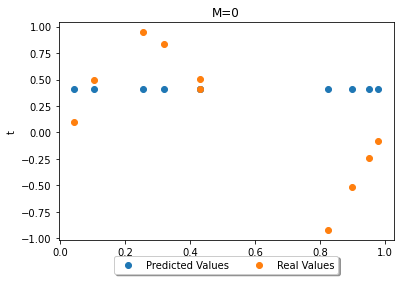

In [ ]:
plt.scatter(train_X,y_zero_order,label="Predicted Values")
plt.scatter(train_X,train_y,label = "Real Values")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("M=0")
plt.xlabel("X")
plt.ylabel("t")
plt.plot()
plt.show()

Graph of order 1

[]

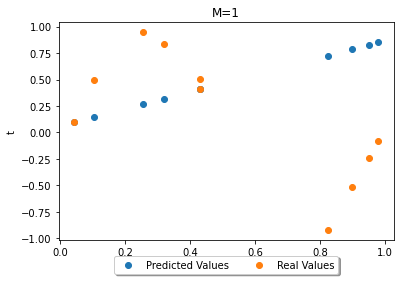

In [ ]:
plt.scatter(train_X,y_first_order,label="Predicted Values")
plt.scatter(train_X,train_y,label = "Real Values")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("M=1")
plt.xlabel("X")
plt.ylabel("t")
plt.plot()

Graph of order 3

[]

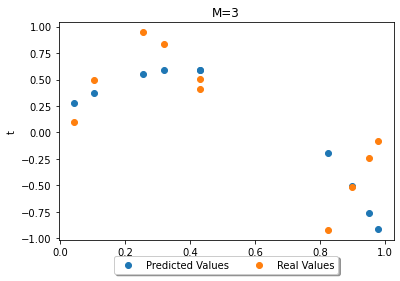

In [ ]:
plt.scatter(train_X,y_third_order,label="Predicted Values")
plt.scatter(train_X,train_y,label = "Real Values")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("M=3")
plt.xlabel("X")
plt.ylabel("t")
plt.plot()

Graph of order 9

[]

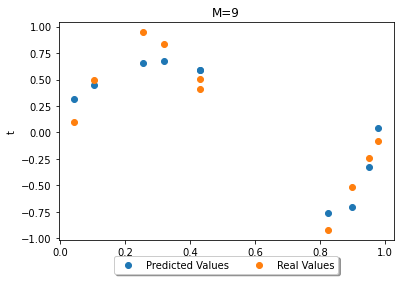

In [ ]:

plt.scatter(train_X,y_ninth_order,label="Predicted Values")
plt.scatter(train_X,train_y,label = "Real Values")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("M=9")
plt.xlabel("X")
plt.ylabel("t")
plt.plot()


***Training Error Graph***

[1.7749370367472766e-30, 2.1612978428908e-28, 0.04632961440848815, 0.03452200943194949, 0.031833001072717665, 2.1612978428908e-28, 2.1612978428908e-28, 2.1612978428908e-28, 2.1612978428908e-28, 0.02828748957616853]


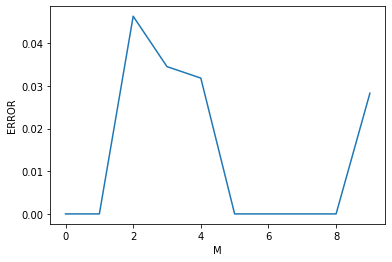

In [ ]:
print(errors_train)

plt.plot([0,1,2,3,4,5,6,7,8,9],errors_train)
plt.xlabel("M")
plt.ylabel("ERROR")
plt.show()

***GENERATING 100 DATA POINTS***

In [ ]:
x_hundred,y_hundred = genXY(100)

 ***TRAINING WITH ORDER 9

In [ ]:
my_poly_regressor_hundred = my_poly_reg(x_hundred,y_hundred,order=9,epochs=iterations)

In [ ]:
weights_hundred,min_error = my_poly_regressor_hundred.fit()

Initial Weights: [0.35518735 0.79885163 0.54627714 0.64417985 0.41102781 0.61118341
 0.71336767 0.20277979 0.65570625 0.86383783]
Least error: 0.05149641659671247
Final weights: [ 0.7367424   0.70716415 -2.75080934 -1.75220538 -0.58458491  0.52806503
  1.02395049  0.55127564  0.83645957  0.77381312]


***GENERATING PREDICTED VALUES OF Y***

In [ ]:
y_ninth_order_hundred =[]
for i in range(len(x_hundred)):
  y_ninth_order_hundred.append(my_poly_regressor_hundred.get_predicted_y(x=x_hundred[i]))

***GRAPH FOR REAL AND PREDICTED VALUES***

[]

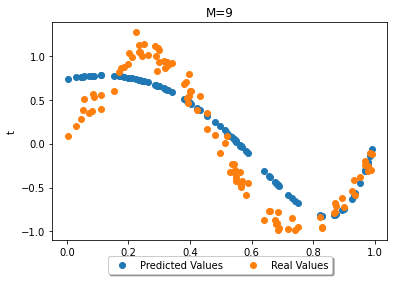

In [ ]:

plt.scatter(x_hundred,y_ninth_order_hundred,label="Predicted Values")
plt.scatter(x_hundred,y_hundred,label = "Real Values")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("M=9")
plt.xlabel("X")
plt.ylabel("t")
plt.plot()